# Uppgift 0 - Uppvärmning
Börja med att göra explorativ dataanalys över hela datasettet. Generella frågor att besvara med hjälp av datan:

In [201]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Project/Data/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [202]:
df1 = pd.read_csv("../Project/Data/noc_regions.csv") #### NOC: National Olympic Committee
df1.head()


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [203]:
df_merge = df1.merge(df, on="NOC",how = "left")
df_merge.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,NaN,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN
1,AFG,Afghanistan,NaN,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN
2,AFG,Afghanistan,NaN,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN
3,AFG,Afghanistan,NaN,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN
4,AFG,Afghanistan,NaN,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN


###   a. hur många länder som är med i datan?

In [204]:
result = df_merge["NOC"].unique()
print(f"The number of countries are included in the data = ", len(result))

The number of countries are included in the data =  230


###   b. vilka länder är med? (förkortningarna räcker)

In [205]:
countries = df_merge["NOC"].unique()
print(f"Countries are involved in data are  \n", countries)

Countries are involved in data are  
 ['AFG' 'AHO' 'ALB' 'ALG' 'AND' 'ANG' 'ANT' 'ANZ' 'ARG' 'ARM' 'ARU' 'ASA'
 'AUS' 'AUT' 'AZE' 'BAH' 'BAN' 'BAR' 'BDI' 'BEL' 'BEN' 'BER' 'BHU' 'BIH'
 'BIZ' 'BLR' 'BOH' 'BOL' 'BOT' 'BRA' 'BRN' 'BRU' 'BUL' 'BUR' 'CAF' 'CAM'
 'CAN' 'CAY' 'CGO' 'CHA' 'CHI' 'CHN' 'CIV' 'CMR' 'COD' 'COK' 'COL' 'COM'
 'CPV' 'CRC' 'CRO' 'CRT' 'CUB' 'CYP' 'CZE' 'DEN' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'ERI' 'ESA' 'ESP' 'EST' 'ETH' 'EUN' 'FIJ' 'FIN' 'FRA' 'FRG' 'FSM'
 'GAB' 'GAM' 'GBR' 'GBS' 'GDR' 'GEO' 'GEQ' 'GER' 'GHA' 'GRE' 'GRN' 'GUA'
 'GUI' 'GUM' 'GUY' 'HAI' 'HKG' 'HON' 'HUN' 'INA' 'IND' 'IOA' 'IRI' 'IRL'
 'IRQ' 'ISL' 'ISR' 'ISV' 'ITA' 'IVB' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KIR' 'KOR' 'KOS' 'KSA' 'KUW' 'LAO' 'LAT' 'LBA' 'LBR' 'LCA' 'LES' 'LIB'
 'LIE' 'LTU' 'LUX' 'MAD' 'MAL' 'MAR' 'MAS' 'MAW' 'MDA' 'MDV' 'MEX' 'MGL'
 'MHL' 'MKD' 'MLI' 'MLT' 'MNE' 'MON' 'MOZ' 'MRI' 'MTN' 'MYA' 'NAM' 'NBO'
 'NCA' 'NED' 'NEP' 'NFL' 'NGR' 'NIG' 'NOR' 'NRU' 'NZL' 'OMA' 'PAK' 'PAN'
 'PAR' 'PER' 

### c. vilka sporter är med?

In [206]:
sports = df_merge["Sport"].unique()
print(f"Sports are included in data are \n", sports)

Sports are included in data are 
 ['Hockey' 'Football' 'Wrestling' 'Athletics' 'Taekwondo' 'Judo' 'Boxing'
 'Weightlifting' 'Shooting' 'Fencing' 'Swimming' 'Sailing' 'Luge'
 'Bobsleigh' 'Synchronized Swimming' 'Triathlon' 'Equestrianism'
 'Alpine Skiing' 'Cycling' 'Volleyball' 'Handball' 'Rowing'
 'Cross Country Skiing' 'Table Tennis' 'Tennis' 'Gymnastics'
 'Trampolining' 'Badminton' 'Canoeing' 'Snowboarding' 'Biathlon'
 'Beach Volleyball' 'Basketball' 'Diving' 'Rugby' 'Rugby Sevens' 'Polo'
 'Modern Pentathlon' 'Archery' 'Water Polo' 'Freestyle Skiing'
 'Art Competitions' 'Skeleton' 'Golf' 'Figure Skating' 'Ice Hockey'
 'Softball' 'Baseball' 'Rhythmic Gymnastics' 'Short Track Speed Skating'
 'Speed Skating' 'Alpinism' 'Nordic Combined' 'Tug-Of-War' 'Ski Jumping'
 'Curling' 'Lacrosse' 'Basque Pelota' 'Military Ski Patrol' 'Cricket'
 'Croquet' 'Motorboating' 'Racquets' 'Jeu De Paume' nan 'Aeronautics'
 'Roque']


### d. vilka medaljtyper finns det?


In [207]:
medals = df_merge.Medal.dropna().unique() #return this without the NaN  
print(f"Types of medal are \n", medals)

Types of medal are 
 ['Bronze' 'Silver' 'Gold']


###   e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse

In [208]:
df1 = df_merge.fillna(0)
df1.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,0,502.0,Ahmad Shah Abouwi,M,0.0,0.0,0.0,Afghanistan,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,0
1,AFG,Afghanistan,0,1076.0,Jammal-ud-Din Affendi,M,28.0,0.0,0.0,Afghanistan,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,0
2,AFG,Afghanistan,0,1101.0,Mohammad Anwar Afzal,M,0.0,0.0,0.0,Afghanistan,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,0
3,AFG,Afghanistan,0,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",0
4,AFG,Afghanistan,0,4628.0,Mohammad Daoud Anwary,M,22.0,0.0,0.0,Afghanistan,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",0


In [209]:
mean = df1["Age"].mean() # average value of age
print(f"The mean value of Age is ", mean)

median = df1["Age"].median() # middle value of age
print(f"The median value of Age is ", median)

minimum = df["Age"].min() # minimun age
print(f"The minimum value of Age is ", minimum)

maximum = df1["Age"].max() # maximum age
print(f"The maximum value of Age is ", maximum)

standard_deviation = df1["Age"].std() # measure of how dispersed the data is in relation to the mean
print(f"The standard deviation of Age is ", standard_deviation)


The mean value of Age is  24.66650047272942
The median value of Age is  24.0
The minimum value of Age is  10.0
The maximum value of Age is  97.0
The standard deviation of Age is  7.8402895971330215


In [210]:
df_merge["Age"].describe() # with out replace nan to zero

count    261305.000000
mean         25.559783
std           6.392501
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

### f. utforska datan vidare med egna frågor

##### 1. How many number of males and females are participated?

In [211]:
print(f"Total number of athletes participated ",df_merge["Sex"].count())

Total number of athletes participated  270767


In [212]:
males = df_merge["ID"][df_merge.Sex == 'M'].count()
print(f"Number of males participated ", males)

females = df_merge["ID"][df_merge.Sex == 'F'].count()
print(f"Number of females participated ", females)

Number of males participated  196374
Number of females participated  74393


In [213]:
F = df_merge["Sex"].value_counts()['F']
M = df_merge["Sex"].value_counts()['M']
F,M

(74393, 196374)

#### 2. Which years Olympic games are held ?

In [214]:
years = df_merge["Year"].unique()
years.sort()
print(f"Olympic games years are \n",years)

Olympic games years are 
 [1896. 1900. 1904. 1906. 1908. 1912. 1920. 1924. 1928. 1932. 1936. 1948.
 1952. 1956. 1960. 1964. 1968. 1972. 1976. 1980. 1984. 1988. 1992. 1994.
 1996. 1998. 2000. 2002. 2004. 2006. 2008. 2010. 2012. 2014. 2016.   nan]


#### 3. How many number of athletes with age more than 50 participated?

In [215]:
age_over50 = df_merge["ID"][df_merge["Age"] > 50].count()
print(f"Number of athletes with age more than 50 participated are ",age_over50)

Number of athletes with age more than 50 participated are  1935


#### 4. What is the maximum and minimum height and weight of a athlete?

In [216]:
maximum = df_merge[["Height", "Weight"]].max()
print(f"Maximum height and weight of athlete \n", maximum)

minimum = df_merge[["Height", "Weight"]].min()
print(f"Minimum height and weight of athlete \n", minimum)

Maximum height and weight of athlete 
 Height    226.0
Weight    214.0
dtype: float64
Minimum height and weight of athlete 
 Height    127.0
Weight     25.0
dtype: float64


## Se även till att plotta några intressanta features, exempelvis:

###  g. diagram över könsfördelningen

In [217]:
df_sex = df_merge.groupby("Sex").count()
df_sex


,NOC,region,notes,ID,Name,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
Sex,,,,,,,,,,,,,,,,
F,74393,74386,901,74393,74393,73969,67264,66657,74393,74393,74393,74393,74393,74393,74393,11246
M,196374,196360,4138,196374,196374,187336,143420,141325,196374,196374,196374,196374,196374,196374,196374,28528


In [218]:
df_sex["ID"]

Sex
F     74393
M    196374
Name: ID, dtype: int64

Text(0.5, 1.0, 'The total male and female athlets in Olympics')

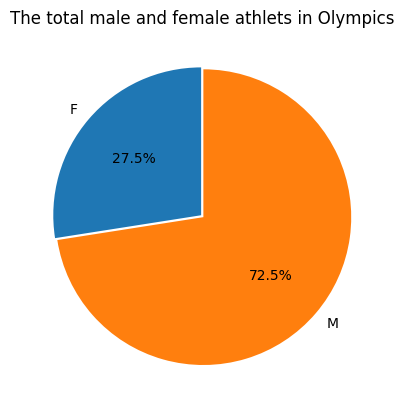

In [219]:
import matplotlib.pyplot as plt

plt.pie(x = df_sex["ID"], labels= df_sex.index, autopct="%0.1f%%", explode=[0.01, 0.01], startangle= 90)
plt.title("The total male and female athlets in Olympics")

###   h. diagram över topp 10 länder som tagit flest medaljer

In [220]:
df_merge.head(2)

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,NaN,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN
1,AFG,Afghanistan,NaN,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN


In [221]:
df_medal = df_merge.groupby("region")[["Medal"]].count().sort_values(by = "Medal",ascending= False).head(10).reset_index()
df_medal

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


In [222]:
import plotly.express as px

fig = px.bar(df_medal, x='region', y='Medal', title= "Top 10 countries that won the most medals")
fig.show()


###  i. plotta gärna fler saker som är intressant

In [223]:
# using pivot_table() - to create a spreadsheet-style pivot table as a DataFrame
table =pd.pivot_table(
    df_merge,
    values="Year",
    index="region",
    columns="Medal",
    aggfunc="count",
    
    margins=True,
    
    margins_name="Total",).fillna(0) 
table.head(5)



Medal,Bronze,Gold,Silver,Total
region,,,,
Afghanistan,2.0,0.0,0.0,2
Algeria,8.0,5.0,4.0,17
Argentina,91.0,91.0,92.0,274
Armenia,9.0,2.0,5.0,16
Australia,522.0,368.0,459.0,1349


In [224]:
df_table = table.sort_values(by = "Total", ascending= False) # sorted all top  5 countries
df_table.head()

Medal,Bronze,Gold,Silver,Total
region,,,,
Total,13291.0,13371.0,13112.0,39774
USA,1358.0,2638.0,1641.0,5637
Russia,1178.0,1599.0,1170.0,3947
Germany,1260.0,1301.0,1195.0,3756
UK,651.0,678.0,739.0,2068


In [225]:
# df.iloc[row_start:row_end , col_start, col_end] - syntax
df_table= df_table.iloc[1: , :].head(5) # to eliminate first row
df_table

Medal,Bronze,Gold,Silver,Total
region,,,,
USA,1358.0,2638.0,1641.0,5637
Russia,1178.0,1599.0,1170.0,3947
Germany,1260.0,1301.0,1195.0,3756
UK,651.0,678.0,739.0,2068
France,666.0,501.0,610.0,1777


In [226]:
fig = px.bar(
    df_table,
    x=df_table.index,
    y=["Bronze", "Silver", "Gold"],
    labels={"region": "countries", "value": "Number of medals"},
    title="Top 5 countries that won  all three medals",
)
fig.show()
